# Projet 4: Anticipez les besoins en consommation de bâtiments

## Chargement des librairies

In [3]:
from urllib import request
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot, transforms
import seaborn as sns
import numpy as np
import re
import IPython.display
sns.set()

### lecture de données 

In [4]:
filepath_2016 = 'C:/Users/Mohamed/Desktop/formation_data_Scientist/projet_4/Donnees/2016_Building_Energy_Benchmarking.csv'
filepath_2017 = 'C:/Users/Mohamed/Desktop/formation_data_Scientist/projet_4/Donnees/2017_Building_Energy_Benchmarking.csv'
filepath_2019 = 'C:/Users/Mohamed/Desktop/formation_data_Scientist/projet_4/Donnees/2019_Building_Energy_Benchmarking.csv'
filepath_2020 = 'C:/Users/Mohamed/Desktop/formation_data_Scientist/projet_4/Donnees/2020_Building_Energy_Benchmarking.csv'

In [5]:
df_2016 = pd.read_csv(filepath_2016)
df_2017 = pd.read_csv(filepath_2017)
df_2019 = pd.read_csv(filepath_2019)
df_2020 = pd.read_csv(filepath_2020)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Mohamed/Desktop/formation_data_Scientist/projet_4/Donnees/2016_Building_Energy_Benchmarking.csv'

In [1453]:
df_2020.shape

(3628, 42)

## 1: Concaténation des datasets du 2017 et 2020

### 1.1: Affichage des colonnes non communes pour les différentes datasets

In [1454]:
list_columns_df = {'df_2016.columns': df_2016.columns,\
                   'df_2017.columns':df_2017.columns,\
                   'df_2020.columns': df_2020.columns, 
                   'df_2019.columns': df_2019.columns}

for key1, value1 in list_columns_df.items():
    for key2, value2 in list_columns_df.items():
        diff = set(value1) -  set(value2)
        diff2 = set(value2) -  set(value1)
        if key1 != key2:
            if diff != set():
                print('colonnes présentes sur ', key1, 'et absentes sur ', key2, 'sont:', diff)
                print('-----------')

colonnes présentes sur  df_2016.columns et absentes sur  df_2017.columns sont: {'Comments'}
-----------
colonnes présentes sur  df_2016.columns et absentes sur  df_2020.columns sont: {'Outlier', 'Comments', 'YearsENERGYSTARCertified', 'ListOfAllPropertyUseTypes', 'DefaultData', 'PropertyName', 'PrimaryPropertyType'}
-----------
colonnes présentes sur  df_2016.columns et absentes sur  df_2019.columns sont: {'Outlier', 'Comments', 'YearsENERGYSTARCertified', 'NumberofBuildings', 'ListOfAllPropertyUseTypes', 'DefaultData', 'PropertyName'}
-----------
colonnes présentes sur  df_2017.columns et absentes sur  df_2020.columns sont: {'Outlier', 'YearsENERGYSTARCertified', 'ListOfAllPropertyUseTypes', 'DefaultData', 'PropertyName', 'PrimaryPropertyType'}
-----------
colonnes présentes sur  df_2017.columns et absentes sur  df_2019.columns sont: {'Outlier', 'YearsENERGYSTARCertified', 'NumberofBuildings', 'ListOfAllPropertyUseTypes', 'DefaultData', 'PropertyName'}
-----------
colonnes présentes s

Nous pouvons observer  que le dataset de 2020 ne contient pas la variable 'NumberofBuildings'. Cette dernière peut etre très importante pour la prédiction. Le datatset de 2020 ne va pas etre utilisé par la suite 

## 1.2 :  Noms unique pour les variables qui donnent les memes informations  

In [1455]:
df_2020['ComplianceIssue'].unique(), df_2016['Outlier'].unique()

(array(['No Issue', 'Default Data', 'Missing 2020 EUI or Electricity Data',
        'Contact the Help Desk', 'Account Requires Verification',
        'Portfolio Manager Account Not Shared'], dtype=object),
 array([nan, 'High outlier', 'Low outlier'], dtype=object))

EPAPropertyType :The primary use of a property (e.g. office, retail store). 
Primary use is defined as a function that accounts for more than 50% of a property. 
This is the Property Type - EPA Calculated field from Portfolio Manager. 

PrimaryPropertyType: The primary use of a property (e.g. office, retail store). Primary use is defined as a function that accounts for more than 50% of a property. This is the Property Type - EPA Calculated field from Portfolio Manager.

BuildingName: Official or common property name on record with the City of Seattle.
 PropertyName : Official or common property name as entered in EPA’s Portfolio Manager.


In [1456]:
def rename_col(df):
    df.rename(columns = {'ComplianceIssue': 'Outlier'}, inplace = True)
    df.rename(columns = {'EPAPropertyType': 'PrimaryPropertyType'}, inplace = True)
    df.rename(columns = {'BuildingName': 'PropertyName'}, inplace = True)
    return df 
df_2020 = rename_col(df_2020)

### 1.3:  Suppression des variables non communes qui ne semble pas pertinentes pour la prédiction

In [1457]:
df_2016.drop(['Comments', 'YearsENERGYSTARCertified', 'DefaultData', 'ListOfAllPropertyUseTypes'], axis = 1,  inplace = True) # peut etre remplac par  'PrimaryPropertyType'
df_2017.drop(['DefaultData', 'ListOfAllPropertyUseTypes', 'YearsENERGYSTARCertified'], axis = 1,  inplace = True) # peut etre remplac par  'PrimaryPropertyType'

### 1.4:  Homogénéisation des types des colonnes

In [1458]:
liste_df = [df_2016, df_2017, df_2020]
df_dtypes = pd.DataFrame([liste.dtypes for liste in liste_df])
df_dtypes.index = [['df_2016.dtypes', 'df_2017.dtypes', 'df_2020.dtypes']]
l = []

In [1459]:
liste_df = [df_2016, df_2017, df_2020]
df_dtypes = pd.DataFrame([liste.dtypes for liste in liste_df])
df_dtypes.index = [['df_2016.dtypes', 'df_2017.dtypes', 'df_2020.dtypes']]
l = []

for cols in df_dtypes: 
    if df_dtypes.loc[:,cols:][cols].nunique() == 1:
        l.append(cols)
df_dtypes = df_dtypes.drop(l, axis = 1,  index=None)
display(df_dtypes) 

for cols in df_dtypes.columns:
    for liste in liste_df:
        if liste.dtypes[cols] == 'int64':
            liste[cols]  = liste[cols].astype('float64')

,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFAParking,PropertyGFABuilding(s),SteamUse(kBtu),Electricity(kWh),NaturalGas(therms)
df_2016.dtypes,int64,int64,float64,int64,int64,int64,float64,float64,float64
df_2017.dtypes,float64,float64,float64,float64,float64,float64,float64,float64,float64
df_2020.dtypes,float64,int64,int64,int64,int64,int64,int64,int64,int64


In [1441]:
data = pd.concat([df_2017,  df_2020], axis=0, sort=False)

In [1445]:
df_2016.duplicated().sum()

0

In [1462]:
data.shape

(7089, 48)

In [1402]:
def tiny_name(df):
    Object_columns = df.select_dtypes(include = 'object')
    for col in Object_columns:
        df[col] = df[col].apply(lambda x: str(x).lower())
        df[col] = df[col].apply(lambda x: str(x).capitalize())
        df[col] = df[col].replace('Nan', np.nan)
    df['City'] = df['City'].apply(lambda x:'Seattlle')
    return df 
data =  tiny_name(data)

In [1403]:
data['Neighborhood'].unique()

array(['Downtown', 'Southeast', 'Northeast', 'East', 'Central', 'North',
       'Magnolia / queen anne', 'Lake union', 'Greater duwamish',
       'Ballard', 'Northwest', 'Southwest', 'Delridge', nan, 'Water',
       'Shared: central &amp; east', 'Delridge neighborhoods',
       'Shared: north &amp; northwest',
       'Shared: greater duwamish &amp; delridge neighborhoods',
       'Shared: ballard &amp; lake union',
       'Shared: lake union &amp; northwest',
       'Shared: ballard &amp; northwest'], dtype=object)

## 2: Nettoyage des données de data

### 2.1 : Affichage des données manquntes

C:\Users\Mohamed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


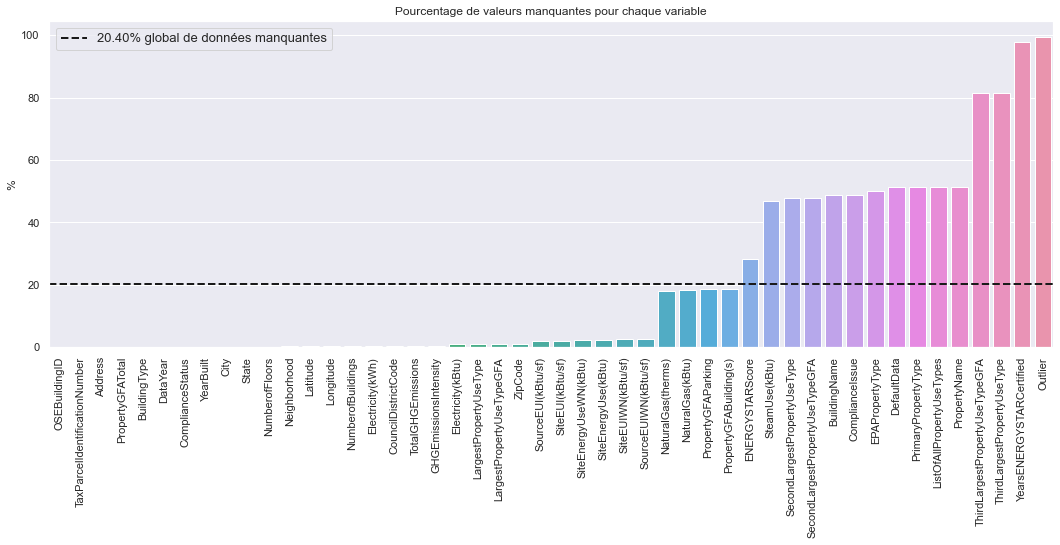

In [1446]:
df = data
null_prop = df.isnull().sum(axis=0).sum()/len(df)/len(df.columns)*100
null = df.isnull().sum(axis=0).sort_values()/len(df)*100
fig = plt.figure(figsize=(18, 6))
plt.axhline(y=null_prop, color='k', linestyle='--', lw=2)
plt.legend(['{:.2f}% global de données manquantes'.format(null_prop)], fontsize=13)
sns.barplot(null.index, null.values)
plt.ylabel("%")
plt.title("Pourcentage de valeurs manquantes pour chaque variable")
plt.xticks(rotation=90)
plt.show()

In [1405]:
data[data.select_dtypes(exclude=['int64', 'float64']).columns].isna().sum()

BuildingType                        0
PrimaryPropertyType               100
PropertyName                       21
Address                             0
City                                0
State                               1
TaxParcelIdentificationNumber       0
Neighborhood                       19
LargestPropertyUseType             73
SecondLargestPropertyUseType     3399
ThirdLargestPropertyUseType      5781
ComplianceStatus                    0
Outlier                          3429
dtype: int64

### 2.2: Filtre sur les Nonresidential buildings

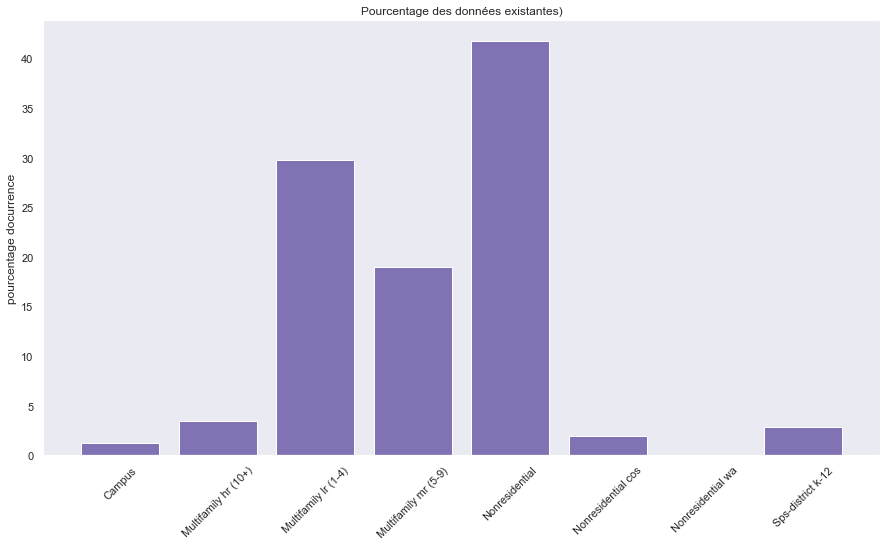

In [1406]:
building_type = data.groupby(by='BuildingType')['OSEBuildingID'].count()/len(data)*100
fig, ax = plt.subplots(figsize = (15, 8))
ax.bar(x = building_type.index, height = building_type .values, color='m', align='center')
ax.set_title('Pourcentage des données existantes)')
ax.set_ylabel('pourcentage docurrence')
ax.tick_params(axis='x', labelrotation=45)
ax.grid(False)

In [1407]:
def filre_type(df):
    building_type_to_keep = ['Nonresidential',  'Nonresidential cos', 'Nonresidential wa', 'Sps-district k-12', 'Campus'] 
    print('le shpae de data avant le filtre sur Nonresidential Building est:', df.shape)
    

    df = df[df['BuildingType'].isin(building_type_to_keep)]
    print('le shpae de data après le filtresur Nonresidential Building est:', df.shape)
    return df
data = filre_type(data)

le shpae de data avant le filtre sur Nonresidential Building est: (7089, 42)
le shpae de data après le filtresur Nonresidential Building est: (3384, 42)


## 3: Vérification de l'existence des données négatives pour les variables énergétiques et les variables surfaces

### 3.1 : Variables énergétiques 

In [1408]:
#connaitre les variables quantitatives qui contiennent des valeurs négatives
liste = ['SourceEUIWN(kBtu/sf)', 'Electricity(kWh)', 'Electricity(kBtu)', 'TotalGHGEmissions', 'GHGEmissionsIntensity'] 
for label in liste:
     print("Le nombre de bâtiments dont {} est <0 est de : {}".format(label,  sum(data[label]<0.0)))
data = data[data[label]>0.0] 

Le nombre de bâtiments dont SourceEUIWN(kBtu/sf) est <0 est de : 0
Le nombre de bâtiments dont Electricity(kWh) est <0 est de : 1
Le nombre de bâtiments dont Electricity(kBtu) est <0 est de : 1
Le nombre de bâtiments dont TotalGHGEmissions est <0 est de : 1
Le nombre de bâtiments dont GHGEmissionsIntensity est <0 est de : 1


### 3.2 : Valeurs négatives pour les surfaces

In [1410]:
def check_negative_Area(df):
    
    for label in ["PropertyGFAParking", "PropertyGFABuilding(s)"]:
        print("Le nombre de bâtiments dont {} est <0 est de : {}".format(label, sum(df[label]<0.0)))
        values_to_nan = df.loc[df[label]<0, label].unique()
        
        if sum(df[label]<0.0)> 0:
            print('il y a des valeurs aberrantes pour la surface')
            df = df[label].replace(values_to_nan, np.nan, inplace=True)
        else:
            print('pas de valeurs aberrantes pour la surface')
    return df
check_negative_Area(data)

Le nombre de bâtiments dont PropertyGFAParking est <0 est de : 0
pas de valeurs aberrantes pour la surface
Le nombre de bâtiments dont PropertyGFABuilding(s) est <0 est de : 0
pas de valeurs aberrantes pour la surface


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,ComplianceStatus,Outlier
0,1,2017,Nonresidential,Hotel,Mayflower park hotel,405 olive way,Seattlle,Wa,98101.0,0659000030,...,7274452.5,2122835.75,1.157783e+06,3.950356e+06,12884.63,1288462.99,197.63,2.235,Compliant,NaN
1,2,2017,Nonresidential,Hotel,Paramount hotel,724 pine street,Seattlle,Wa,98101.0,0659000220,...,7678810.5,NaN,8.841610e+05,3.016757e+06,47880.87,4788086.72,266.78,2.576,Compliant,NaN
2,3,2017,Campus,Hotel,84sc9-the westin seattle,1900 5th avenue,Seattlle,Wa,98101.0,0659000475,...,74311368.0,24313482.00,1.427692e+07,4.871284e+07,14440.00,1444000.10,1570.75,1.643,Compliant,NaN
3,5,2017,Nonresidential,Hotel,Hotel max,620 stewart st,Seattlle,Wa,98101.0,0659000640,...,7294312.0,2228119.50,8.817449e+05,3.008514e+06,21355.88,2135587.89,244.32,3.984,Compliant,NaN
4,8,2017,Nonresidential,Hotel,Warwick seattle hotel (id8),401 lenora st,Seattlle,Wa,98121.0,0659000970,...,14081251.0,NaN,1.523506e+06,5.198202e+06,91375.76,9137575.78,506.80,2.886,Compliant,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3605,50668,2020,Nonresidential,Hotel,Moxy hotel,1016 republican st,Seattlle,Wa,98109.0,1983200355,...,2579078.0,0.00,4.990510e+05,1.702761e+06,8763.00,876317.00,55.60,1.000,Compliant,No issue
3608,50672,2020,Nonresidential,Mixed use property,Old spaghetti factory building,2815 elliott ave,Seattlle,Wa,98121.0,7666202305,...,2958432.0,0.00,7.138850e+05,2.435774e+06,5227.00,522657.00,40.70,1.200,Compliant,No issue
3611,50675,2020,Nonresidential,Manufacturing/industrial plant,Cubesmart self storage,9309 aurora ave n,Seattlle,Wa,98103.0,1532300095,...,1082878.0,0.00,8.884600e+04,3.031440e+05,7797.00,779734.00,43.00,0.300,Compliant,No issue
3620,50684,2020,Nonresidential,Self-storage facility,Simply self storage,1602 15th ave w,Seattlle,Wa,98119.0,3657700050,...,2456414.0,0.00,2.112530e+05,7.207950e+05,17356.00,1735619.00,96.00,0.400,Compliant,No issue


## 3: Traitement des données manquantes et des outliers

In [1411]:
def filre_energy(df):
    
    list_energy = ['Electricity(kBtu)', 'NaturalGas(kBtu)', 'SteamUse(kBtu)']

    energy_sum = df[list_energy].sum(axis=1)
    tot_energy_use = df["SiteEnergyUse(kBtu)"]
    df["diff_energy"] = abs((tot_energy_use - energy_sum))*100/tot_energy_use
                      
    print("Le nombre de bâtiments où diff_energy' > 5 % : avant le filtre est: {}".format(sum(df["diff_energy"]>=5)))
                      
    df = df[df["diff_energy"]<5]
    print("Le nombre de bâtiments où diff_energy' > 5 % : apres le filtre est: {}" \
          .format(sum(df["diff_energy"]>=5)))
    df = df.drop(columns=["diff_energy"])
    return df
filre_energy(data)

Le nombre de bâtiments où diff_energy' > 5 % : avant le filtre est: 205
Le nombre de bâtiments où diff_energy' > 5 % : apres le filtre est: 0


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,ComplianceStatus,Outlier
0,1,2017,Nonresidential,Hotel,Mayflower park hotel,405 olive way,Seattlle,Wa,98101.0,0659000030,...,7274452.5,2122835.75,1.157783e+06,3.950356e+06,12884.63,1288462.99,197.63,2.235,Compliant,NaN
1,2,2017,Nonresidential,Hotel,Paramount hotel,724 pine street,Seattlle,Wa,98101.0,0659000220,...,7678810.5,NaN,8.841610e+05,3.016757e+06,47880.87,4788086.72,266.78,2.576,Compliant,NaN
2,3,2017,Campus,Hotel,84sc9-the westin seattle,1900 5th avenue,Seattlle,Wa,98101.0,0659000475,...,74311368.0,24313482.00,1.427692e+07,4.871284e+07,14440.00,1444000.10,1570.75,1.643,Compliant,NaN
3,5,2017,Nonresidential,Hotel,Hotel max,620 stewart st,Seattlle,Wa,98101.0,0659000640,...,7294312.0,2228119.50,8.817449e+05,3.008514e+06,21355.88,2135587.89,244.32,3.984,Compliant,NaN
4,8,2017,Nonresidential,Hotel,Warwick seattle hotel (id8),401 lenora st,Seattlle,Wa,98121.0,0659000970,...,14081251.0,NaN,1.523506e+06,5.198202e+06,91375.76,9137575.78,506.80,2.886,Compliant,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3595,50656,2020,Nonresidential,Office,Amazon reinvent towers (east + west),2100 7th ave,Seattlle,Wa,98121.0,0660000270,...,39158448.0,0.00,9.993618e+06,3.409822e+07,50602.00,5060223.00,450.10,0.400,Compliant,No issue
3605,50668,2020,Nonresidential,Hotel,Moxy hotel,1016 republican st,Seattlle,Wa,98109.0,1983200355,...,2579078.0,0.00,4.990510e+05,1.702761e+06,8763.00,876317.00,55.60,1.000,Compliant,No issue
3608,50672,2020,Nonresidential,Mixed use property,Old spaghetti factory building,2815 elliott ave,Seattlle,Wa,98121.0,7666202305,...,2958432.0,0.00,7.138850e+05,2.435774e+06,5227.00,522657.00,40.70,1.200,Compliant,No issue
3611,50675,2020,Nonresidential,Manufacturing/industrial plant,Cubesmart self storage,9309 aurora ave n,Seattlle,Wa,98103.0,1532300095,...,1082878.0,0.00,8.884600e+04,3.031440e+05,7797.00,779734.00,43.00,0.300,Compliant,No issue


## 4:  Outliers et imputation des données manquantes

### 4.1: Filtre sur compliance status

In [1412]:
data['ComplianceStatus'].unique()
def filtre_compliant(df):
    
    Compliance_Rate =  df[df['ComplianceStatus'] == 'Compliant']\
                      ['ComplianceStatus'].count()/len(df)*100
    
    print("Compliance Rate data: ", Compliance_Rate)
    print(df.shape)
    
    #filtre sur les statuts compliants si le taux de compliance est > 90%
    if Compliance_Rate >= 90:
        df  = df[df['ComplianceStatus'] == 'Compliant']
        print(df.shape)
    else:
        print('le taux du non compliance est > 10% ')
    return df
data = filtre_compliant(data)

Compliance Rate data:  94.14990859232175
(3282, 43)
(3090, 43)


### 4.2: Correction du nombre de bâtiments (ne peut être nul)

In [1413]:
def outlier_NumberofBuildings(df):
    
    #Vérification de l'existence des valeurs nulles pour numéro des batiments
    zero_value = (df['NumberofBuildings'] == 0).sum()
    
    #remplacer des valeurs nulles par la valeur la plus fréquente de la médiane
    median_groupby =  df.groupby('PrimaryPropertyType')\
                      ['NumberofBuildings'].median().value_counts()
    
    most_frequen_median = median_groupby.mode()[0]
    print('la valeur la plus fréquante de la médiane est:', most_frequen_median)
    
    if zero_value != 0:
        print('le nombre de valeurs nulle pour NumberofBuildings dans le datatset est:', zero_value)
   
        df['NumberofBuildings'] = df['NumberofBuildings'].replace({0: most_frequen_median})
        zero_value_imput = (df['NumberofBuildings'] == 0).sum()
        
        print('le nombre de valeurs nulle pour NumberofBuildings dans le datatset après limputaion est:', (zero_value_imput))
              
    else:
        print('je ne trouve pas une valeur nulle pour NumberofBuildings dans le datatset')
              
    return df
outlier_NumberofBuildings(data)    

la valeur la plus fréquante de la médiane est: 1
le nombre de valeurs nulle pour NumberofBuildings dans le datatset est: 52
le nombre de valeurs nulle pour NumberofBuildings dans le datatset après limputaion est: 0


C:\Users\Mohamed\AppData\Local\Temp\ipykernel_1476\2732770432.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NumberofBuildings'] = df['NumberofBuildings'].replace({0: most_frequen_median})


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,ComplianceStatus,Outlier,diff_energy
0,1,2017,Nonresidential,Hotel,Mayflower park hotel,405 olive way,Seattlle,Wa,98101.0,0659000030,...,2122835.75,1.157783e+06,3.950356e+06,12884.63,1288462.99,197.63,2.235,Compliant,NaN,0.000003
1,2,2017,Nonresidential,Hotel,Paramount hotel,724 pine street,Seattlle,Wa,98101.0,0659000220,...,NaN,8.841610e+05,3.016757e+06,47880.87,4788086.72,266.78,2.576,Compliant,NaN,0.000006
2,3,2017,Campus,Hotel,84sc9-the westin seattle,1900 5th avenue,Seattlle,Wa,98101.0,0659000475,...,24313482.00,1.427692e+07,4.871284e+07,14440.00,1444000.10,1570.75,1.643,Compliant,NaN,0.000007
3,5,2017,Nonresidential,Hotel,Hotel max,620 stewart st,Seattlle,Wa,98101.0,0659000640,...,2228119.50,8.817449e+05,3.008514e+06,21355.88,2135587.89,244.32,3.984,Compliant,NaN,0.000008
4,8,2017,Nonresidential,Hotel,Warwick seattle hotel (id8),401 lenora st,Seattlle,Wa,98121.0,0659000970,...,NaN,1.523506e+06,5.198202e+06,91375.76,9137575.78,506.80,2.886,Compliant,NaN,0.000004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3605,50668,2020,Nonresidential,Hotel,Moxy hotel,1016 republican st,Seattlle,Wa,98109.0,1983200355,...,0.00,4.990510e+05,1.702761e+06,8763.00,876317.00,55.60,1.000,Compliant,No issue,0.000000
3608,50672,2020,Nonresidential,Mixed use property,Old spaghetti factory building,2815 elliott ave,Seattlle,Wa,98121.0,7666202305,...,0.00,7.138850e+05,2.435774e+06,5227.00,522657.00,40.70,1.200,Compliant,No issue,0.306350
3611,50675,2020,Nonresidential,Manufacturing/industrial plant,Cubesmart self storage,9309 aurora ave n,Seattlle,Wa,98103.0,1532300095,...,0.00,8.884600e+04,3.031440e+05,7797.00,779734.00,43.00,0.300,Compliant,No issue,0.000000
3620,50684,2020,Nonresidential,Self-storage facility,Simply self storage,1602 15th ave w,Seattlle,Wa,98119.0,3657700050,...,0.00,2.112530e+05,7.207950e+05,17356.00,1735619.00,96.00,0.400,Compliant,No issue,5.287396


### 4.3: Impuatation des données manquantes

#### 4.3.1: Varibales numériques

In [1414]:
def imput_num_var(df):

#Affichage des valeurs nulles pour l'énergier utilisée
    site_energy_use = df['SiteEnergyUseWN(kBtu)']
    print('le nombre de valeur nulle pour E est: ', (site_energy_use == 0).sum())
    if (site_energy_use == 0).sum()> 0:
        site_energy_use = site_energy_use.replace({0, np.nan})
                                              
#imputation des valeurs manquantes par la médiane et par zéro                                              
    list_ipmut_mediane = ['LargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEnergyUseWN(kBtu)']
    list_ipmut_zero = ['SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA']
                                              
    for columns in list_ipmut_mediane:
        df[columns] = df[columns ].fillna(data[columns].median())
    for columns in list_ipmut_zero:
        df[columns] = df[columns ].fillna(0)
    return df
imput_num_var(data)

le nombre de valeur nulle pour E est:  0


C:\Users\Mohamed\AppData\Local\Temp\ipykernel_1476\1024757856.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns] = df[columns ].fillna(data[columns].median())
C:\Users\Mohamed\AppData\Local\Temp\ipykernel_1476\1024757856.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns] = df[columns ].fillna(0)


,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,ComplianceStatus,Outlier,diff_energy
0,1,2017,Nonresidential,Hotel,Mayflower park hotel,405 olive way,Seattlle,Wa,98101.0,0659000030,...,2122835.75,1.157783e+06,3.950356e+06,12884.63,1288462.99,197.63,2.235,Compliant,NaN,0.000003
1,2,2017,Nonresidential,Hotel,Paramount hotel,724 pine street,Seattlle,Wa,98101.0,0659000220,...,NaN,8.841610e+05,3.016757e+06,47880.87,4788086.72,266.78,2.576,Compliant,NaN,0.000006
2,3,2017,Campus,Hotel,84sc9-the westin seattle,1900 5th avenue,Seattlle,Wa,98101.0,0659000475,...,24313482.00,1.427692e+07,4.871284e+07,14440.00,1444000.10,1570.75,1.643,Compliant,NaN,0.000007
3,5,2017,Nonresidential,Hotel,Hotel max,620 stewart st,Seattlle,Wa,98101.0,0659000640,...,2228119.50,8.817449e+05,3.008514e+06,21355.88,2135587.89,244.32,3.984,Compliant,NaN,0.000008
4,8,2017,Nonresidential,Hotel,Warwick seattle hotel (id8),401 lenora st,Seattlle,Wa,98121.0,0659000970,...,NaN,1.523506e+06,5.198202e+06,91375.76,9137575.78,506.80,2.886,Compliant,NaN,0.000004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3605,50668,2020,Nonresidential,Hotel,Moxy hotel,1016 republican st,Seattlle,Wa,98109.0,1983200355,...,0.00,4.990510e+05,1.702761e+06,8763.00,876317.00,55.60,1.000,Compliant,No issue,0.000000
3608,50672,2020,Nonresidential,Mixed use property,Old spaghetti factory building,2815 elliott ave,Seattlle,Wa,98121.0,7666202305,...,0.00,7.138850e+05,2.435774e+06,5227.00,522657.00,40.70,1.200,Compliant,No issue,0.306350
3611,50675,2020,Nonresidential,Manufacturing/industrial plant,Cubesmart self storage,9309 aurora ave n,Seattlle,Wa,98103.0,1532300095,...,0.00,8.884600e+04,3.031440e+05,7797.00,779734.00,43.00,0.300,Compliant,No issue,0.000000
3620,50684,2020,Nonresidential,Self-storage facility,Simply self storage,1602 15th ave w,Seattlle,Wa,98119.0,3657700050,...,0.00,2.112530e+05,7.207950e+05,17356.00,1735619.00,96.00,0.400,Compliant,No issue,5.287396


In [1415]:
data[data.select_dtypes(include=['int64', 'float64']).columns].isna().sum()

OSEBuildingID                         0
DataYear                              0
ZipCode                              15
CouncilDistrictCode                  13
Latitude                              9
Longitude                             9
YearBuilt                             1
NumberofBuildings                     0
NumberofFloors                        7
PropertyGFATotal                      0
PropertyGFAParking                   66
PropertyGFABuilding(s)               65
LargestPropertyUseTypeGFA             0
SecondLargestPropertyUseTypeGFA       0
ThirdLargestPropertyUseTypeGFA        0
ENERGYSTARScore                       0
SiteEUI(kBtu/sf)                      0
SiteEUIWN(kBtu/sf)                   23
SourceEUI(kBtu/sf)                    0
SourceEUIWN(kBtu/sf)                 23
SiteEnergyUse(kBtu)                  14
SiteEnergyUseWN(kBtu)                 0
SteamUse(kBtu)                     1409
Electricity(kWh)                      0
Electricity(kBtu)                     0


#### 4.3.2 Varibales catégorielles

Nous pouvons constaté que, pour les variables catégorielles, les colonnes qui présentent une quantité de NaN très importantes sont:
SecondLargestPropertyUseType,  ThirdLargestPropertyUseType et YearsENERGYSTARCertified. Les quelques valeurs manquantes sur la variable "LargestPropertyUseType" 
sont remplacé par 'Missing'. Les valeurs manquantes sur SecondLargestPropertyUseType,  ThirdLargestPropertyUseType sont remplacé par 'Nothing'.

In [1418]:
def imput_Larest_property_use(df):
    
    Larest_property_use = df[['LargestPropertyUseType', 
                            'SecondLargestPropertyUseType', 
                              'ThirdLargestPropertyUseType']]
    
    for col in Larest_property_use.columns:
        Nan_value = df[df[col] == 'Nan'][col].count()
        print('le nombre doccurrennce de Nan dans', col,'est:', Nan_value)
            
        df[col] = df[col].replace('Nan', np.nan)
        
        if col == 'LargestPropertyUseType':
            df[col] = df[col].fillna('Missing')
            
        else:
            df[col] = df[col].fillna('Nothing')
    return df
imput_Larest_property_use(data)

le nombre doccurrennce de Nan dans LargestPropertyUseType est: 0
le nombre doccurrennce de Nan dans SecondLargestPropertyUseType est: 0
le nombre doccurrennce de Nan dans ThirdLargestPropertyUseType est: 0


C:\Users\Mohamed\AppData\Local\Temp\ipykernel_1476\1028180600.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].replace('Nan', np.nan)
C:\Users\Mohamed\AppData\Local\Temp\ipykernel_1476\1028180600.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna('Missing')
C:\Users\Mohamed\AppData\Local\Temp\ipykernel_1476\1028180600.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = va

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,ComplianceStatus,Outlier,diff_energy
0,1,2017,Nonresidential,Hotel,Mayflower park hotel,405 olive way,Seattlle,Wa,98101.0,0659000030,...,2122835.75,1.157783e+06,3.950356e+06,12884.63,1288462.99,197.63,2.235,Compliant,NaN,0.000003
1,2,2017,Nonresidential,Hotel,Paramount hotel,724 pine street,Seattlle,Wa,98101.0,0659000220,...,NaN,8.841610e+05,3.016757e+06,47880.87,4788086.72,266.78,2.576,Compliant,NaN,0.000006
2,3,2017,Campus,Hotel,84sc9-the westin seattle,1900 5th avenue,Seattlle,Wa,98101.0,0659000475,...,24313482.00,1.427692e+07,4.871284e+07,14440.00,1444000.10,1570.75,1.643,Compliant,NaN,0.000007
3,5,2017,Nonresidential,Hotel,Hotel max,620 stewart st,Seattlle,Wa,98101.0,0659000640,...,2228119.50,8.817449e+05,3.008514e+06,21355.88,2135587.89,244.32,3.984,Compliant,NaN,0.000008
4,8,2017,Nonresidential,Hotel,Warwick seattle hotel (id8),401 lenora st,Seattlle,Wa,98121.0,0659000970,...,NaN,1.523506e+06,5.198202e+06,91375.76,9137575.78,506.80,2.886,Compliant,NaN,0.000004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3605,50668,2020,Nonresidential,Hotel,Moxy hotel,1016 republican st,Seattlle,Wa,98109.0,1983200355,...,0.00,4.990510e+05,1.702761e+06,8763.00,876317.00,55.60,1.000,Compliant,No issue,0.000000
3608,50672,2020,Nonresidential,Mixed use property,Old spaghetti factory building,2815 elliott ave,Seattlle,Wa,98121.0,7666202305,...,0.00,7.138850e+05,2.435774e+06,5227.00,522657.00,40.70,1.200,Compliant,No issue,0.306350
3611,50675,2020,Nonresidential,Manufacturing/industrial plant,Cubesmart self storage,9309 aurora ave n,Seattlle,Wa,98103.0,1532300095,...,0.00,8.884600e+04,3.031440e+05,7797.00,779734.00,43.00,0.300,Compliant,No issue,0.000000
3620,50684,2020,Nonresidential,Self-storage facility,Simply self storage,1602 15th ave w,Seattlle,Wa,98119.0,3657700050,...,0.00,2.112530e+05,7.207950e+05,17356.00,1735619.00,96.00,0.400,Compliant,No issue,5.287396


In [1419]:
data[data.select_dtypes(include=['object']).columns].isna().sum()

BuildingType                        0
PrimaryPropertyType                21
PropertyName                        0
Address                             0
City                                0
State                               1
TaxParcelIdentificationNumber       0
Neighborhood                        9
LargestPropertyUseType              0
SecondLargestPropertyUseType        0
ThirdLargestPropertyUseType         0
ComplianceStatus                    0
Outlier                          1529
dtype: int64

L'observation sur les variables numérques montre un peu de données manquantes sauf pour ENERGYSTARScore   SecondLargestPropertyUseTypeGFA et ThirdLargestPropertyUseTypeGFA. 

### 4.4: Suppression des colonnes qui n'ont pas d'intéret pour la prédiction

In [1420]:
columns_to_drop2 = ['NaturalGas(kBtu)',                      
'NaturalGas(therms)',                    
'Electricity(kBtu)',                      
'Electricity(kWh)',                      
'SteamUse(kBtu)',
'SourceEUIWN(kBtu/sf)',                  
'SourceEUI(kBtu/sf)',                    
'SiteEUI(kBtu/sf)',                               
'GHGEmissionsIntensity', 'SiteEnergyUse(kBtu)', 'SiteEUIWN(kBtu/sf)'] 
data.drop(columns_to_drop2, axis = 1, inplace= True)

C:\Users\Mohamed\AppData\Local\Temp\ipykernel_1476\2800558515.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns_to_drop2, axis = 1, inplace= True)


In [1421]:
columns_to_drop = [ 'ComplianceStatus',
                   'ZipCode', 
                   'Outlier',
    'TaxParcelIdentificationNumber',
 'DataYear',
'OSEBuildingID',
  'PropertyName',
    'Address', 'City', 'State'] 
data.drop(columns_to_drop, axis = 1, inplace= True)

C:\Users\Mohamed\AppData\Local\Temp\ipykernel_1476\4066435892.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns_to_drop, axis = 1, inplace= True)


## 5: Analayse exploratoire  

### 5.1: Analyse univariée

C:\Users\Mohamed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


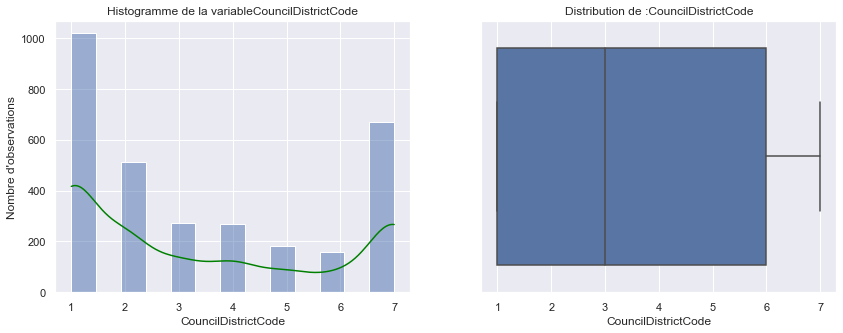

C:\Users\Mohamed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


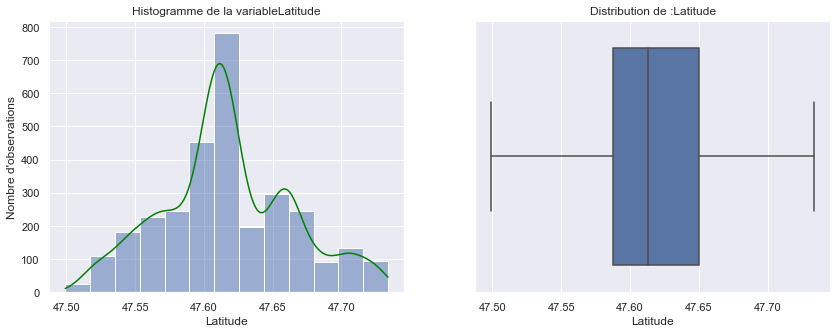

C:\Users\Mohamed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


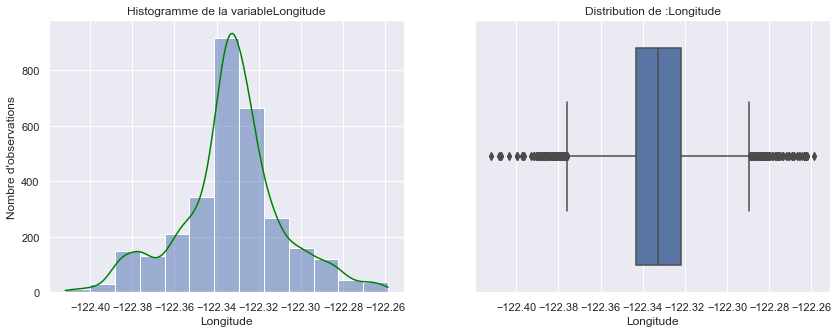

C:\Users\Mohamed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


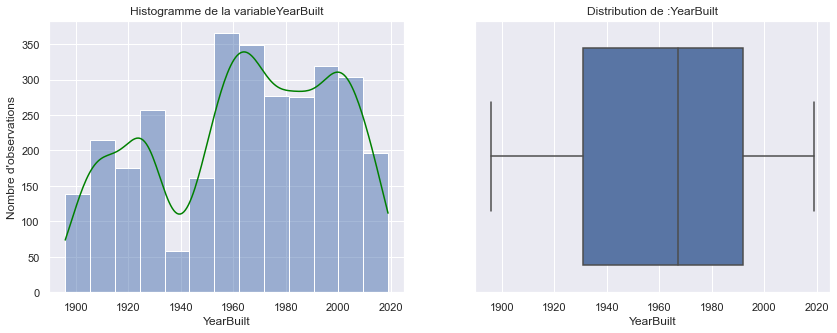

C:\Users\Mohamed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


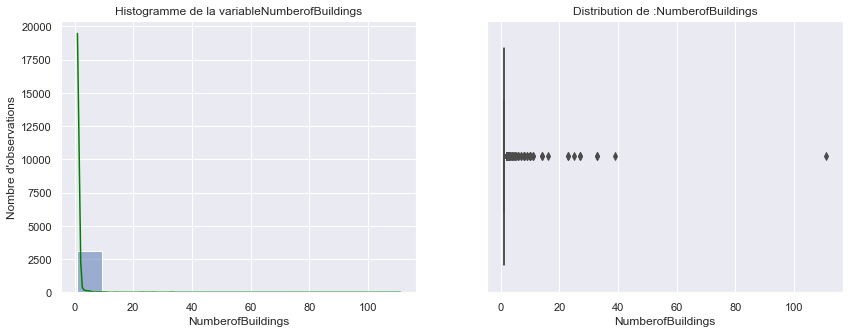

C:\Users\Mohamed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


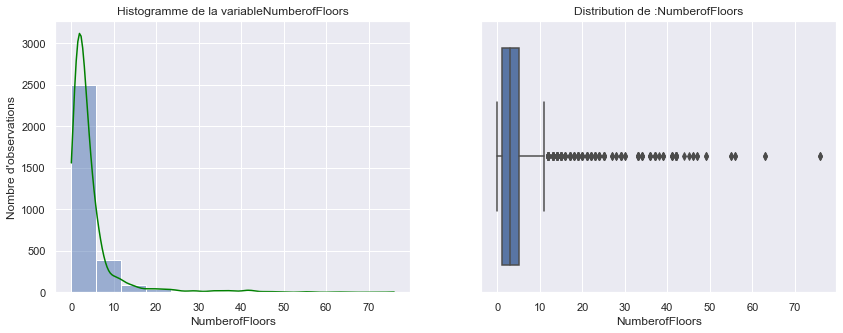

C:\Users\Mohamed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


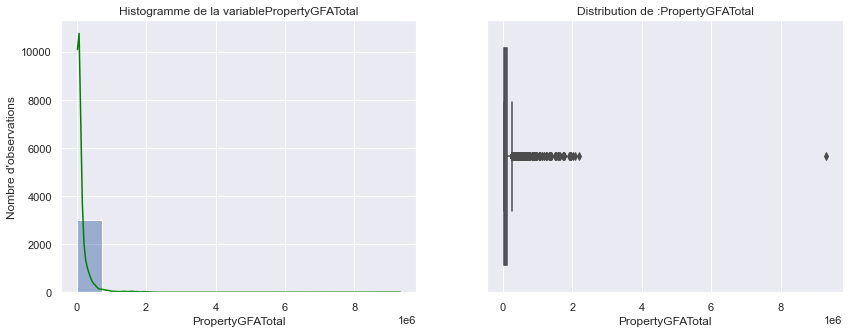

C:\Users\Mohamed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


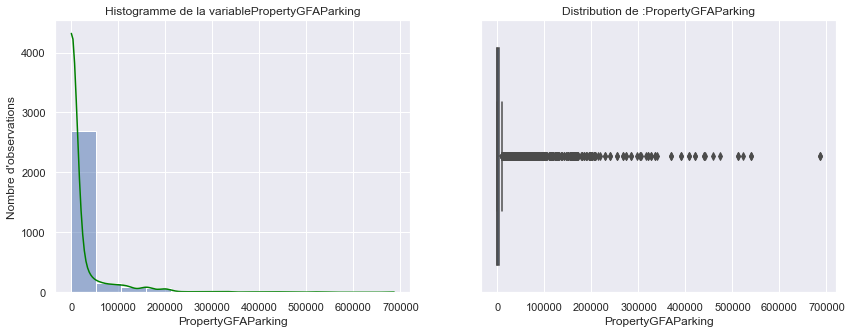

C:\Users\Mohamed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


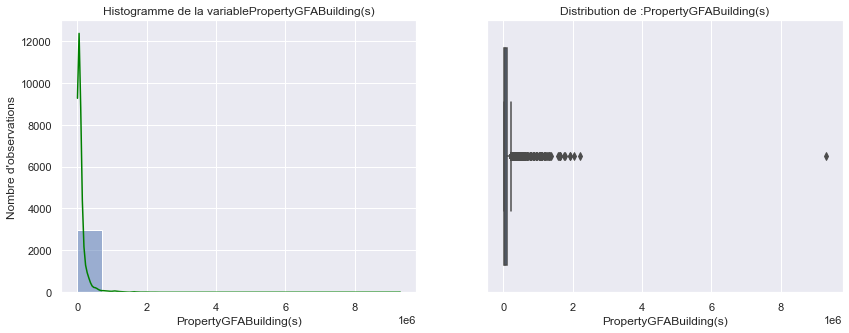

C:\Users\Mohamed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


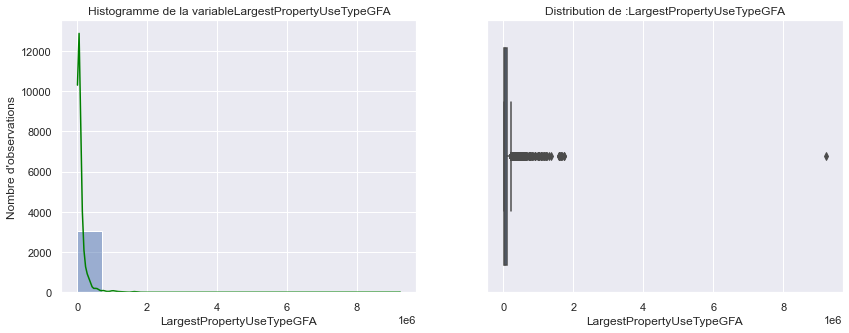

C:\Users\Mohamed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


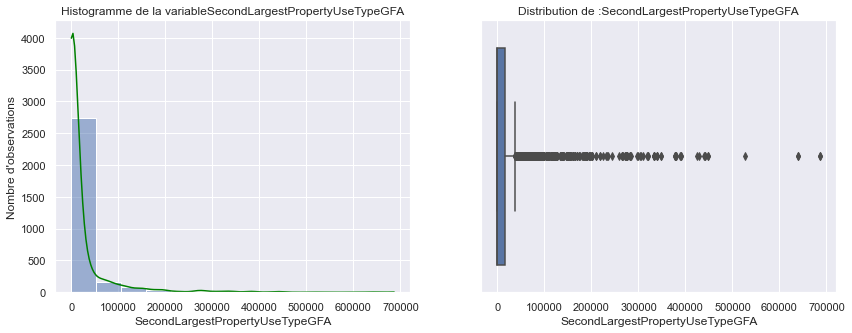

C:\Users\Mohamed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


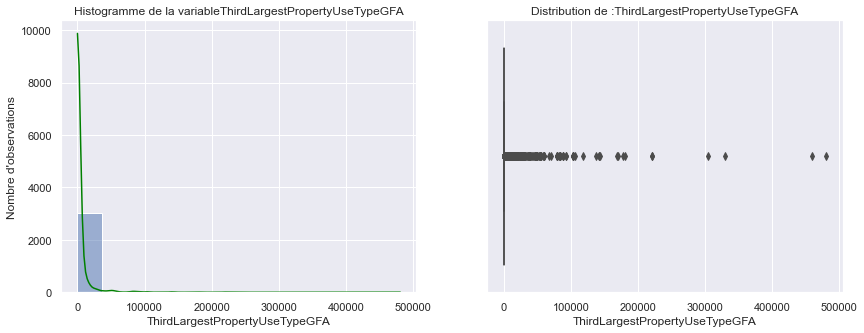

C:\Users\Mohamed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


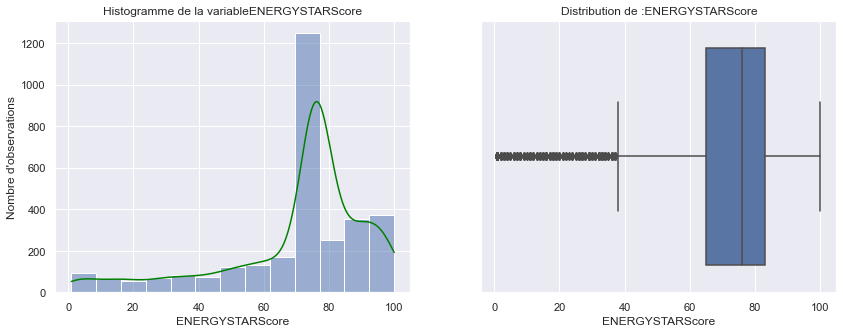

C:\Users\Mohamed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


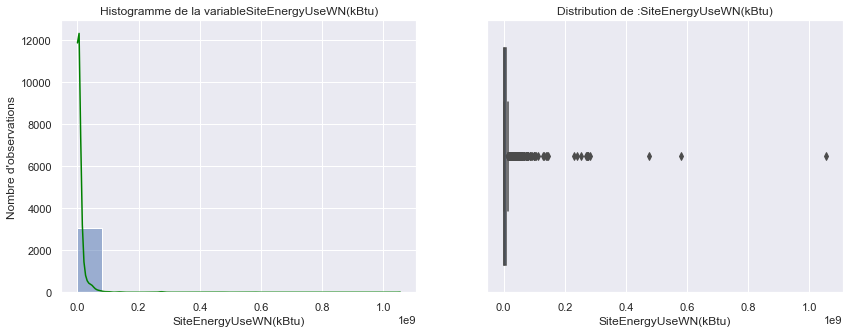

C:\Users\Mohamed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


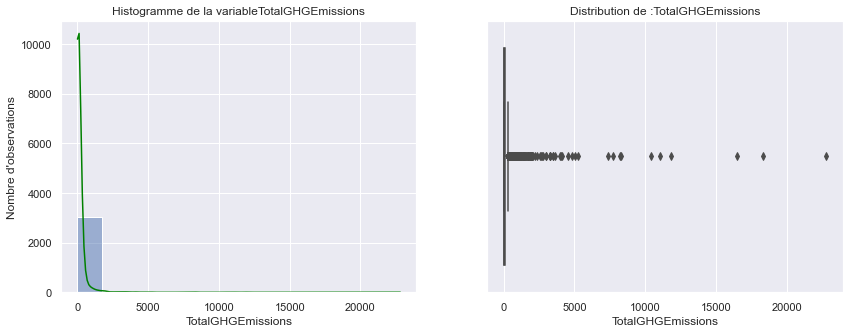

C:\Users\Mohamed\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


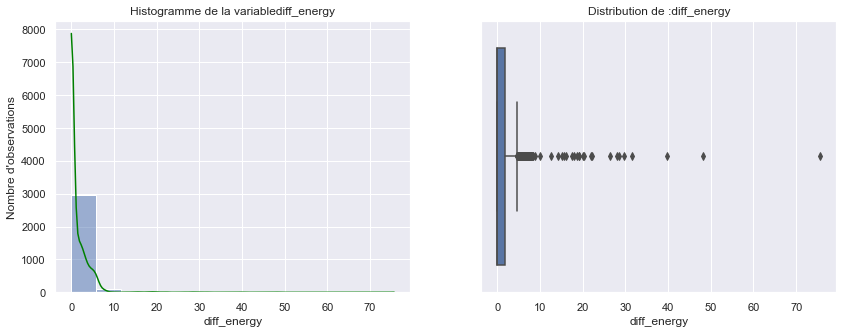

In [1381]:
for col in data.select_dtypes(include = ['float64', 'int64']).columns.tolist():
        fig = plt.figure(figsize = (14, 5))
        gs = fig.add_gridspec(1,2)
        ax = fig.add_subplot(gs[0,0])
        ax1 = fig.add_subplot(gs[0,1])
        #ax1 = Histogramme
        #sns.kdeplot(df[col], ax = ax)
        sns.histplot(data[col], ax = ax,  bins="sturges",  kde = True)
        ax.lines[0].set_color('green')
        ax.set_xlabel(col)
        ax.set_ylabel("Nombre d'observations")
        ax.set_title('Histogramme de la variable'+ col )
        #ax1: Boite à Maustache
        sns.boxplot(data[col])
        ax1.set_xlabel(col)
        ax1.set_title('Distribution de :' + col )
        plt.show()

In [1340]:
### Analyse Multivariée 

### 5.2: Matrice de corelation

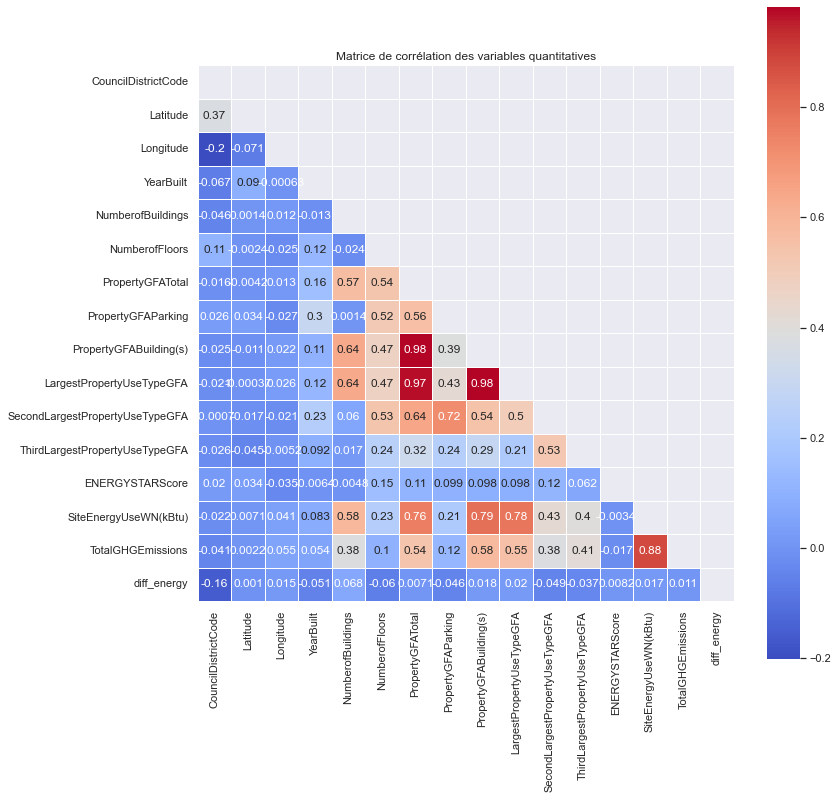

In [1422]:
corr_matrix = data.select_dtypes(include = ['int', 'float']).corr()
mask = np.triu(corr_matrix)
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, cmap="coolwarm", mask=mask, linewidths=.5, annot=True, cbar=True, square=True)
plt.title("Matrice de corrélation des variables quantitatives")
#plt.savefig("Présentation/Images/matrice_corr.png")
plt.show()

In [1423]:
data.drop(['PropertyGFAParking', 'PropertyGFABuilding(s)'], axis = 1, inplace = True)

C:\Users\Mohamed\AppData\Local\Temp\ipykernel_1476\2870692017.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['PropertyGFAParking', 'PropertyGFABuilding(s)'], axis = 1, inplace = True)


## 6: Préparation des features

In [1384]:
def affichage_groupe(df):
    Liste_P_U_T = []
    for colL in  df['LargestPropertyUseType'].unique():
        Liste_P_U_T.append(colL)
    for colS in df['SecondLargestPropertyUseType'].unique():
        Liste_P_U_T.append(colS)
    for colT in df['ThirdLargestPropertyUseType'].unique():
        Liste_P_U_T.append(colT)
    for colP in df['PrimaryPropertyType'].unique():
        Liste_P_U_T.append(colP)
    Liste_P_U_T_U = np.unique(Liste_P_U_T)
    display(Liste_P_U_T_U)
    return Liste_P_U_T_U
affichage_groupe(df = data)

array(['Adult educa', 'Adult education', 'Automobile',
       'Automobile dealership', 'Bank branch', 'Bar/nightclub',
       'Barracks', 'College/uni', 'College/university',
       'Convenience store without gas station', 'Convention',
       'Convention center', 'Courthouse', 'Data center', 'Distributio',
       'Distribution center', 'Enclosed ma', 'Enclosed mall',
       'Energy/power station', 'Fast food restaurant', 'Financial o',
       'Financial office', 'Fire statio', 'Fire station', 'Fitness cen',
       'Fitness center/health club/gym', 'Food sales', 'Food servic',
       'Food service', 'High-rise multifamily', 'Hospital', 'Hospital (g',
       'Hospital (general medical & surgical)', 'Hotel', 'K-12 school',
       'Laboratory', 'Large office', 'Library', 'Lifestyle c',
       'Lifestyle center', 'Low-rise multifamily',
       'Mailing center/post office', 'Manufacturi',
       'Manufacturing/industrial plant', 'Medical off', 'Medical office',
       'Mid-rise multifamily'

array(['Adult educa', 'Adult education', 'Automobile',
       'Automobile dealership', 'Bank branch', 'Bar/nightclub',
       'Barracks', 'College/uni', 'College/university',
       'Convenience store without gas station', 'Convention',
       'Convention center', 'Courthouse', 'Data center', 'Distributio',
       'Distribution center', 'Enclosed ma', 'Enclosed mall',
       'Energy/power station', 'Fast food restaurant', 'Financial o',
       'Financial office', 'Fire statio', 'Fire station', 'Fitness cen',
       'Fitness center/health club/gym', 'Food sales', 'Food servic',
       'Food service', 'High-rise multifamily', 'Hospital', 'Hospital (g',
       'Hospital (general medical & surgical)', 'Hotel', 'K-12 school',
       'Laboratory', 'Large office', 'Library', 'Lifestyle c',
       'Lifestyle center', 'Low-rise multifamily',
       'Mailing center/post office', 'Manufacturi',
       'Manufacturing/industrial plant', 'Medical off', 'Medical office',
       'Mid-rise multifamily'

In [1425]:
def groupe_property_use(df):
    property_use = df.loc[:,['LargestPropertyUseType', 
                               'SecondLargestPropertyUseType', 
                               'ThirdLargestPropertyUseType', 
                            'PrimaryPropertyType']]
    
    List_to_keep = ['Large office', 'Mixed use property', 
         'Non-refrigerated warehouse','Nothing', 
         'Office', 'Other', 'Parking',
         'Small- and mid-sized office', 'Warehouse']
    
    for col in property_use.columns:
        for ind in df[col].unique():
            if ind not in List_to_keep:
                df[col] = df[col].replace(ind,'Other')
                df[col] = df[col].replace({'Large office':'Office', 'Small- and mid-sized office':'Office', 
                                           'Non-refrigerated warehouse': 'Warehouse'})
    return df
affichage_groupe(df = data)
groupe_property_use(data)

array(['Mixed use property', 'Nothing', 'Office', 'Other', 'Parking',
       'Warehouse'], dtype='<U18')

,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUseWN(kBtu),TotalGHGEmissions,diff_energy
0,Nonresidential,Other,7.0,Downtown,47.61220,-122.33799,1927.0,1.0,12.0,88434,Other,88434.0,Nothing,0.0,Nothing,0.0,63.0,7274452.5,197.63,0.000003
1,Nonresidential,Other,7.0,Downtown,47.61317,-122.33393,1996.0,1.0,11.0,103566,Other,83880.0,Parking,15064.0,Other,4622.0,72.0,7678810.5,266.78,0.000006
2,Campus,Other,7.0,Downtown,47.61393,-122.33810,1969.0,1.0,41.0,956110,Other,756493.0,Parking,138635.0,Other,0.0,48.0,74311368.0,1570.75,0.000007
3,Nonresidential,Other,7.0,Downtown,47.61412,-122.33664,1926.0,1.0,10.0,61320,Other,61320.0,Nothing,0.0,Nothing,0.0,51.0,7294312.0,244.32,0.000008
4,Nonresidential,Other,7.0,Downtown,47.61375,-122.34047,1980.0,1.0,18.0,175580,Other,123445.0,Parking,68009.0,Other,0.0,78.0,14081251.0,506.80,0.000004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3605,Nonresidential,Other,1.0,Lake union,47.62334,-122.33619,2017.0,1.0,8.0,56540,Other,45656.0,Nothing,0.0,Nothing,0.0,76.0,2579078.0,55.60,0.000000
3608,Nonresidential,Mixed use property,1.0,Downtown,47.61503,-122.35378,2015.0,1.0,3.0,46620,Other,61057.0,Office,34396.0,Parking,26776.0,76.0,2958432.0,40.70,0.306350
3611,Nonresidential,Other,1.0,Northwest,47.69679,-122.34490,2019.0,1.0,4.0,150138,Other,101930.0,Nothing,0.0,Nothing,0.0,76.0,1082878.0,43.00,0.000000
3620,Nonresidential,Other,1.0,Magnolia / queen anne,47.63377,-122.37559,2018.0,1.0,5.0,270000,Other,270000.0,Nothing,0.0,Nothing,0.0,76.0,2456414.0,96.00,5.287396


#### Affichage des property_use commune

In [1305]:
data

,BuildingType,PrimaryPropertyType,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUseWN(kBtu),TotalGHGEmissions,diff_energy
0,Nonresidential,Other,7.0,Downtown,47.61220,-122.33799,1927.0,1.0,12.0,88434,Other,88434.0,Nothing,0.0,Nothing,0.0,63.0,7274452.5,197.63,0.000003
1,Nonresidential,Other,7.0,Downtown,47.61317,-122.33393,1996.0,1.0,11.0,103566,Other,83880.0,Parking,15064.0,Other,4622.0,72.0,7678810.5,266.78,0.000006
2,Campus,Other,7.0,Downtown,47.61393,-122.33810,1969.0,1.0,41.0,956110,Other,756493.0,Parking,138635.0,Other,0.0,48.0,74311368.0,1570.75,0.000007
3,Nonresidential,Other,7.0,Downtown,47.61412,-122.33664,1926.0,1.0,10.0,61320,Other,61320.0,Nothing,0.0,Nothing,0.0,51.0,7294312.0,244.32,0.000008
4,Nonresidential,Other,7.0,Downtown,47.61375,-122.34047,1980.0,1.0,18.0,175580,Other,123445.0,Parking,68009.0,Other,0.0,78.0,14081251.0,506.80,0.000004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3605,Nonresidential,Other,1.0,Lake union,47.62334,-122.33619,2017.0,1.0,8.0,56540,Other,45656.0,Nothing,0.0,Nothing,0.0,76.0,2579078.0,55.60,0.000000
3608,Nonresidential,Mixed use property,1.0,Downtown,47.61503,-122.35378,2015.0,1.0,3.0,46620,Other,61057.0,Office,34396.0,Parking,26776.0,74.0,2958432.0,40.70,0.306350
3611,Nonresidential,Other,1.0,Northwest,47.69679,-122.34490,2019.0,1.0,4.0,150138,Other,101930.0,Nothing,0.0,Nothing,0.0,74.0,1082878.0,43.00,0.000000
3620,Nonresidential,Other,1.0,Magnolia / queen anne,47.63377,-122.37559,2018.0,1.0,5.0,270000,Other,270000.0,Nothing,0.0,Nothing,0.0,74.0,2456414.0,96.00,5.287396


In [1191]:
#data['Neighborhood'] = data['Neighborhood'].str.lower()

In [1426]:
data = data.dropna()

In [1429]:
data['Neighborhood'].value_counts()

Downtown                 680
Greater duwamish         607
Lake union               291
Magnolia / queen anne    282
Northeast                257
East                     208
Northwest                174
Ballard                  116
North                    106
Central                   93
Delridge                  83
Southeast                 81
Southwest                 77
Name: Neighborhood, dtype: int64

In [1428]:
data['Neighborhood'] = data['Neighborhood'].replace({'Delridge neighborhoods': 'Delridge', 
                                                               'Shared: north &amp; northwest': 'Northwest',
                                                              'Shared: central &amp; east': 'East',
                                                      'Shared: greater duwamish &amp; delridge neighborhoods': 'Delridge',
                                                      'Shared: ballard &amp; lake union': 'Lake union', 
                                                      'Shared: ballard &amp; northwest': 'Northwest',
                                                      'Shared: lake union &amp; northwest': 'Northwest', 'Water': 'Northwest',
                                                      'Delridge ': 'Delridge'})

C:\Users\Mohamed\AppData\Local\Temp\ipykernel_1476\4106843130.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Neighborhood'] = data['Neighborhood'].replace({'Delridge neighborhoods': 'Delridge',


### Souvegarde du datatset

In [1430]:
data.to_csv('C:/Users/Mohamed/Desktop/formation_data_Scientist/projet_4/Donnees/df_cleaned_data', index=False)

In [1239]:
df_2016.to_csv('C:/Users/Mohamed/Desktop/formation_data_Scientist/projet_4/Donnees/data_to_clean/df_2016_to_cleand.csv', index=False)